#Country Life Expectancy and Health Expenditures Analysis

This analysis explores the relationship between Life Expectancy at Birth (years) and Health Expenditures (as a % of GDP) across several countries using information from 2000-2023. The data is sourced from the World Bank Open Data site: https://data.worldbank.org/.



In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import data
health_expenditures_df = pd.read_csv('Health_Expenditures.csv', skiprows=4)
life_expectancy_df = pd.read_csv('Life_Expectancy.csv', skiprows=4)

In [ ]:
health_expenditures_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.067770,5.928989,5.789177,5.812624,6.035792,6.043925,5.728123,NaN,NaN,NaN
2,Afghanistan,AFG,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.818590,12.620817,14.208419,14.831320,15.533614,21.508461,23.088169,NaN,NaN,NaN
3,Africa Western and Central,AFW,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.835177,3.744485,3.302830,3.326789,3.891477,4.154973,4.210206,NaN,NaN,NaN
4,Angola,AGO,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.713150,2.793838,2.594822,2.475188,3.274885,3.092771,2.927376,NaN,NaN,NaN


In [ ]:
life_expectancy_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,64.049000,64.215000,64.602000,64.944000,65.303000,65.615000,...,75.540000,75.620000,75.880000,76.019000,75.406000,73.655000,76.226000,76.353000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,44.169257,44.468838,44.877890,45.160583,45.535695,45.770723,...,62.167981,62.591275,63.330691,63.857261,63.766484,62.979999,64.487020,65.146291,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.799000,33.291000,33.757000,34.201000,34.673000,35.124000,...,62.646000,62.406000,62.443000,62.941000,61.454000,60.417000,65.617000,66.035000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.779636,38.058956,38.681792,38.936918,39.194580,39.479784,...,56.392452,56.626439,57.036976,57.149847,57.364425,57.362572,57.987813,58.855722,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.933000,36.902000,37.168000,37.419000,37.704000,37.968000,...,61.619000,62.122000,62.622000,63.051000,63.116000,62.958000,64.246000,64.617000,NaN,NaN


##Data Cleaning and Preparation

In [ ]:
# Filter for years of interest
years = [str(year) for year in range(2000, 2023)]

# Filter for relevant columns
health_expenditures_df = health_expenditures_df[['Country Name'] + years]
life_expectancy_df = life_expectancy_df[['Country Name'] + years]

In [ ]:
# Calculate % of NaNs per country in life expectancy
nan_percent_life = life_expectancy_df[years].isna().mean(axis=1)

# Keep countries with <= 70% NaNs in life expectancy
countries_to_keep_life = life_expectancy_df.loc[nan_percent_life <= 0.7, "Country Name"]

# Remove these countries from both datasets (life expectancy and health expenditure)
life_expectancy_filtered = life_expectancy_df[life_expectancy_df["Country Name"].isin(countries_to_keep_life)].copy()
health_filtered = health_expenditures_df[health_expenditures_df["Country Name"].isin(countries_to_keep_life)].copy()

# Calculate % of NaNs per country in health expenditure
nan_percent_health = health_expenditures_df[years].isna().mean(axis=1)

# Keep countries with <= 70% NaNs in health expenditure
countries_to_keep_health = health_expenditures_df.loc[nan_percent_health <= 0.7, "Country Name"]

# Remove these countries from both datasets (life expectancy and health expenditure)
life_expectancy_filtered = life_expectancy_filtered[life_expectancy_filtered["Country Name"].isin(countries_to_keep_health)].copy()
health_filtered = health_filtered[health_filtered["Country Name"].isin(countries_to_keep_health)].copy()

In [ ]:
# Pivot dataframes
health_df = pd.melt(health_filtered, id_vars=['Country Name'], value_vars=years, var_name='Year', value_name='Health_Expenditure')
life_df = pd.melt(life_expectancy_filtered, id_vars=['Country Name'], value_vars=years, var_name='Year', value_name="Life_Expectancy")

In [ ]:
# Merge both datasets on 'Country Name' and 'Year'
merged_df = pd.merge(life_df, health_df, on=['Country Name', 'Year'])

In [ ]:
merged_df.head()

,Country Name,Year,Life_Expectancy,Health_Expenditure
0,Africa Eastern and Southern,2000,52.557342,5.654027
1,Afghanistan,2000,55.005000,NaN
2,Africa Western and Central,2000,50.297983,3.462852
3,Angola,2000,46.501000,1.908599
4,Albania,2000,74.826000,5.944198


In [ ]:
# Impute missing life expectancy values using each country's respective median
merged_df['Life_Expectancy'] = merged_df.groupby('Country Name')['Life_Expectancy'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# Impute missing health expenditure values using each country's respective median
merged_df['Health_Expenditure'] = merged_df.groupby('Country Name')['Health_Expenditure'].transform(lambda x: x.fillna(x.median()))

In [ ]:
merged_df.head()

,Country Name,Year,Life_Expectancy,Health_Expenditure
0,Africa Eastern and Southern,2000,52.557342,5.654027
1,Afghanistan,2000,55.005000,9.948289
2,Africa Western and Central,2000,50.297983,3.462852
3,Angola,2000,46.501000,1.908599
4,Albania,2000,74.826000,5.944198


In [ ]:
# Define common non-country entries to exclude
non_countries = [
    'IDA & IBRD total', 'IDA blend', 'IDA total', 'Not classified'
]

# Filter out those rows
merged_df = merged_df[~merged_df['Country Name'].isin(non_countries)]

##Exploratory Data Analysis

In [ ]:
# Confirm no NaN values left in each column
merged_df.isna().sum()

,0
Country Name,0
Year,0
Life_Expectancy,0
Health_Expenditure,0


In [ ]:
# Descriptive Statistics
merged_df.describe()

,Life_Expectancy,Health_Expenditure
count,5405.000000,5405.000000
mean,69.824244,6.217117
std,8.600269,2.822863
min,14.665000,1.107200
25%,64.328000,4.239487
50%,71.302000,5.460094
75%,76.025789,7.841502
max,86.151000,24.230690


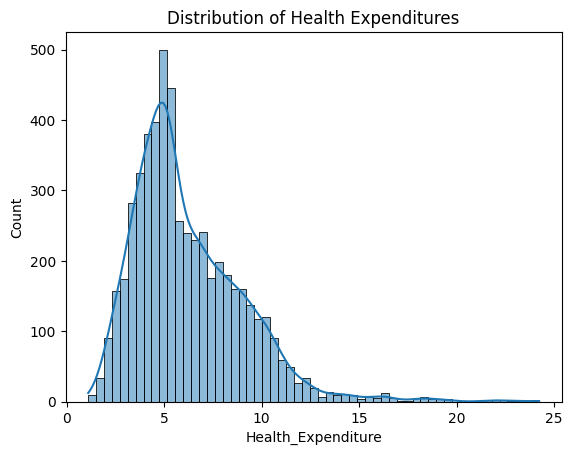

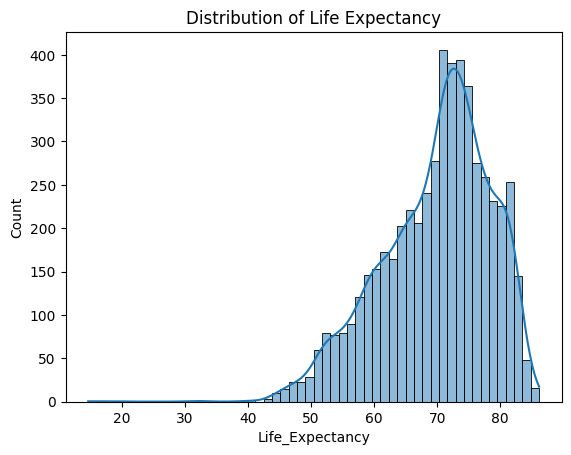

In [ ]:
# Histogram of Health Expenditure
sns.histplot(merged_df['Health_Expenditure'], kde=True)
plt.title('Distribution of Health Expenditures')
plt.show()

# Histogram of Life Expectancy
sns.histplot(merged_df['Life_Expectancy'], kde=True)
plt.title('Distribution of Life Expectancy')
plt.show()

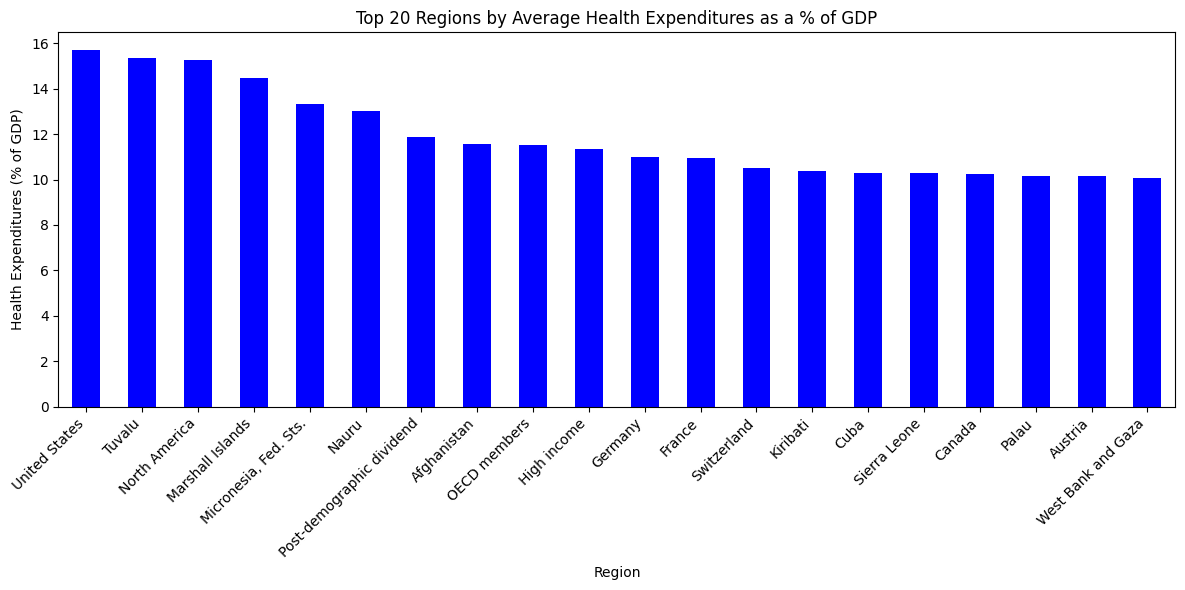

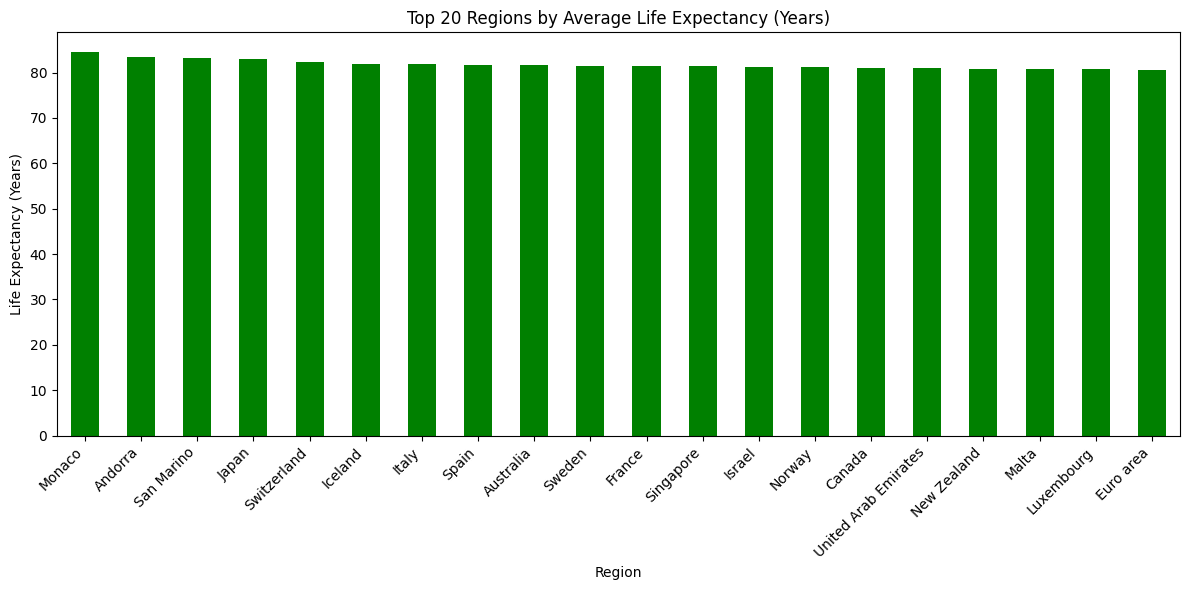

In [ ]:
# Group by country and calculate the average values
country_avg = merged_df.groupby('Country Name')[['Health_Expenditure', 'Life_Expectancy']].mean()

# Plot Top 20 Countries by Average Health Expenditure
top_20_health = country_avg['Health_Expenditure'].sort_values(ascending=False).head(20)
top_20_health.plot(kind='bar', figsize=(12, 6), color='blue')
plt.title('Top 20 Regions by Average Health Expenditures as a % of GDP')
plt.ylabel('Health Expenditures (% of GDP)')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot Top 20 Countries by Average Life Expectancy
top_20_life = country_avg['Life_Expectancy'].sort_values(ascending=False).head(20)
top_20_life.plot(kind='bar', figsize=(12, 6), color='green')
plt.title('Top 20 Regions by Average Life Expectancy (Years)')
plt.ylabel('Life Expectancy (Years)')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Linear Regression Model

In [ ]:
# Extract X and y columns
X = merged_df[['Health_Expenditure']]
y = merged_df['Life_Expectancy']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model for linear regression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [ ]:
# Evaluate the model
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))

R-squared: 0.0947946799416376
Mean Absolute Error (MAE): 6.355545489290272
Mean Squared Error (MSE): 63.67928187208333


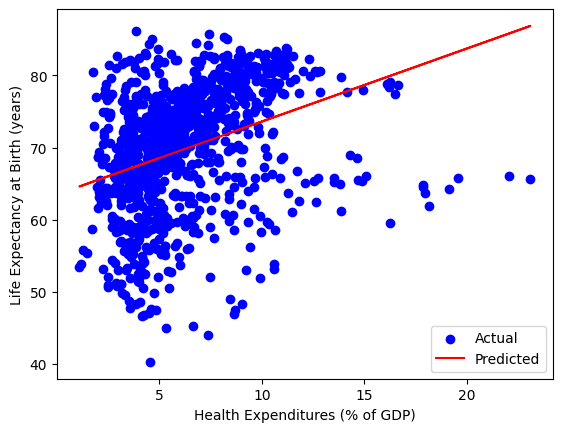

In [ ]:
# Plot the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Health Expenditures (% of GDP)')
plt.ylabel('Life Expectancy at Birth (years)')
plt.legend()
plt.show()

The low R-squared value suggests that the model isn't capturing much of the relationship between Health Expenditures and Life Expectancy. There may be other factors (income level, education levels, sanitation, etc.) involved to fully explain the relationship.